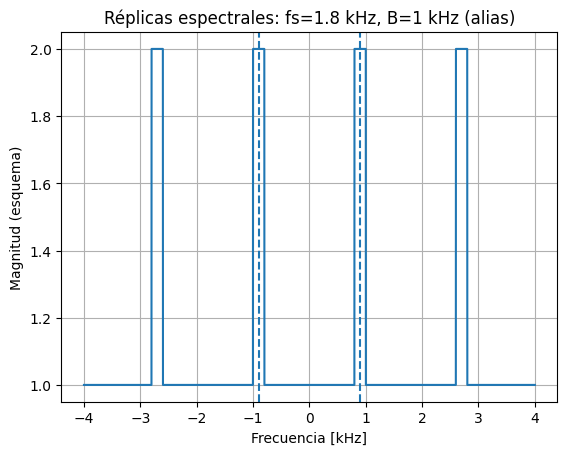

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1_800.0  # Hz
B  = 1_000.0  # Hz ancho de banda
fN = fs/2

def replicas(fs, B, f_axis, num=3):
    y = np.zeros_like(f_axis)
    for k in range(-num, num+1):
        f0 = k*fs
        y += ((f_axis >= (f0 - B)) & (f_axis <= (f0 + B))).astype(float)
    return y

f = np.linspace(-4000, 4000, 4001)  # Hz
y = replicas(fs, B, f, num=3)

plt.figure()
plt.plot(f/1000, y)              # no especifico colores
plt.axvline(+fN/1000, linestyle='--')
plt.axvline(-fN/1000, linestyle='--')
plt.title("Réplicas espectrales: fs=1.8 kHz, B=1 kHz (alias)")
plt.xlabel("Frecuencia [kHz]")
plt.ylabel("Magnitud (esquema)")
plt.grid(True)
plt.show()


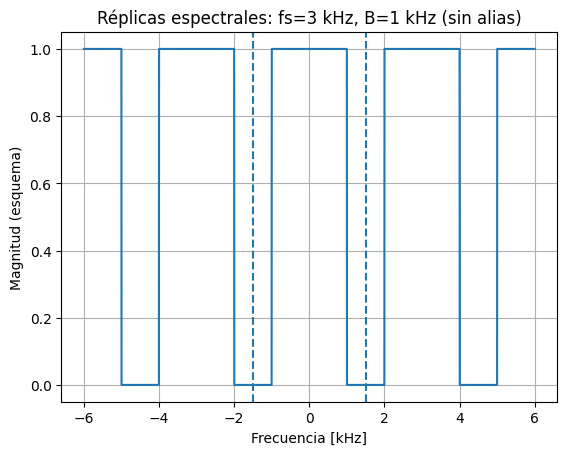

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fs = 3_000.0  # Hz
B  = 1_000.0  # Hz
fN = fs/2

def replicas(fs, B, f_axis, num=3):
    y = np.zeros_like(f_axis)
    for k in range(-num, num+1):
        f0 = k*fs
        y += ((f_axis >= (f0 - B)) & (f_axis <= (f0 + B))).astype(float)
    return y

f = np.linspace(-6000, 6000, 6001)  # Hz
y = replicas(fs, B, f, num=3)

plt.figure()
plt.plot(f/1000, y)
plt.axvline(+fN/1000, linestyle='--')
plt.axvline(-fN/1000, linestyle='--')
plt.title("Réplicas espectrales: fs=3 kHz, B=1 kHz (sin alias)")
plt.xlabel("Frecuencia [kHz]")
plt.ylabel("Magnitud (esquema)")
plt.grid(True)
plt.show()


fs = 2000.0 Hz, fN = 1000.0 Hz
f1 = 950.0 Hz  -> alias = 950.0 Hz
f2 = 1050.0 Hz  -> alias = 950.0 Hz (debe coincidir con f1)


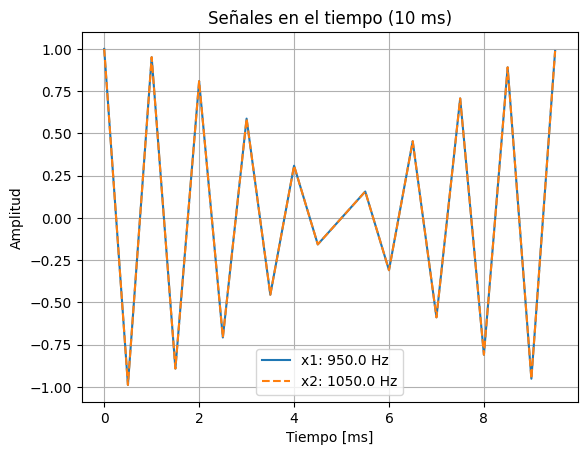

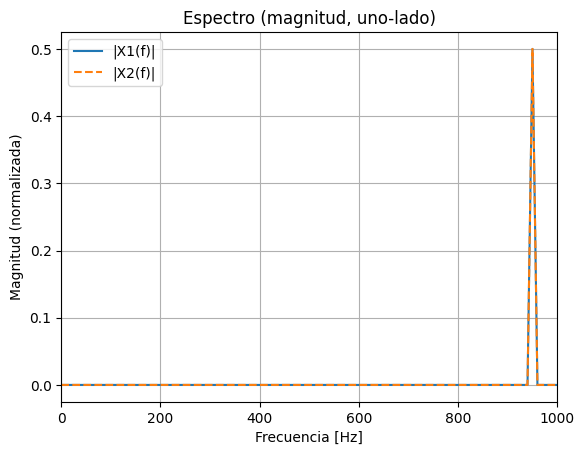

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------ Parámetros ------------------
fs      = 2000.0         # Hz (frecuencia de muestreo)
fN      = fs/2            # Hz (Nyquist)
delta   = 50.0            # Hz (separación respecto de fN)
A       = 1.0             # amplitud
phi     = 0.0             # fase inicial (rad)
dur     = 0.1             # s duración total a simular
use_sine = False          # True: seno, False: coseno

# Frecuencias a probar
f1 = fN - delta
f2 = fN + delta

# Función para alias (plegado a [0, fN])
def alias_freq(f, fs):
    # pliega alrededor de fN: devuelve frecuencia observada en [0, fs/2]
    return abs(((f + fs/2) % fs) - fs/2)

print(f"fs = {fs:.1f} Hz, fN = {fN:.1f} Hz")
print(f"f1 = {f1:.1f} Hz  -> alias = {alias_freq(f1, fs):.1f} Hz")
print(f"f2 = {f2:.1f} Hz  -> alias = {alias_freq(f2, fs):.1f} Hz (debe coincidir con f1)")

# ------------------ Señales ------------------
N  = int(dur*fs)
n  = np.arange(N)
t  = n/fs
w1 = 2*np.pi*f1/fs
w2 = 2*np.pi*f2/fs

if use_sine:
    x1 = A*np.sin(2*np.pi*f1*t + phi)
    x2 = A*np.sin(2*np.pi*f2*t + phi)
else:
    x1 = A*np.cos(2*np.pi*f1*t + phi)
    x2 = A*np.cos(2*np.pi*f2*t + phi)

# ------------------ Gráfico 1: tiempo ------------------
# (Mostramos solo los primeros milisegundos para ver la forma)
ms_to_show = 10e-3              # 10 ms
M = int(ms_to_show*fs)

plt.figure()
plt.plot(t[:M]*1e3, x1[:M], label=f"x1: {f1:.1f} Hz")
plt.plot(t[:M]*1e3, x2[:M], label=f"x2: {f2:.1f} Hz", linestyle='--')
plt.title("Señales en el tiempo (10 ms)")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# ------------------ Gráfico 2: espectro (FFT) ------------------
# Ventana rectangular a propósito (TS1/TS2). Magnitud en dos lados.
X1 = np.fft.rfft(x1)  # uno-lado
X2 = np.fft.rfft(x2)
f  = np.fft.rfftfreq(N, d=1/fs)

plt.figure()
plt.plot(f, np.abs(X1)/N, label="|X1(f)|")
plt.plot(f, np.abs(X2)/N, label="|X2(f)|", linestyle='--')
plt.xlim(0, fs/2)     # miramos hasta Nyquist
plt.title("Espectro (magnitud, uno-lado)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud (normalizada)")
plt.legend()
plt.grid(True)
plt.show()
